In [118]:
from keras.layers import *
from keras.models import Sequential,Model

y = Input(shape = (240,240,3))
z = Input(shape = (10,))
x = Conv2D(10,(3,3))(y)
x = Conv2D(7,(5,5))(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Concatenate()([x,z])
x = Dense(100)(x)
x = Dropout(0.1)(x)

model = Model([y,z],x)
model.summary()
# model.add(Conv2D(10,(3,3),input_shape = (240,240,3)))
# model.add(Conv2D(7,(5,5)))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(100))
# model.add(Dropout(0.1))

# model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 238, 238, 10) 280         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 234, 234, 7)  1757        conv2d_7[0][0]                   
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 234, 234, 7)  28          conv2d_8[0][0]                   
__________________________________________________________________________________________________
flatten_4 

In [122]:
import keras.backend as K
print(Sequential().__class__.__name__)
# K.placeholder(shape = model.input[1].shape)

Sequential


In [124]:
for layer in model.layers:
    print(layer.output)

Tensor("input_2:0", shape=(?, 240, 240, 3), dtype=float32)
Tensor("conv2d_7/BiasAdd:0", shape=(?, 238, 238, 10), dtype=float32)
Tensor("conv2d_8/BiasAdd:0", shape=(?, 234, 234, 7), dtype=float32)
Tensor("batch_normalization_4/cond/Merge:0", shape=(?, 234, 234, 7), dtype=float32)
Tensor("flatten_4/Reshape:0", shape=(?, ?), dtype=float32)
Tensor("input_3:0", shape=(?, 10), dtype=float32)
Tensor("concatenate_1/concat:0", shape=(?, ?), dtype=float32)
Tensor("dense_4/BiasAdd:0", shape=(?, 100), dtype=float32)
Tensor("dropout_4/cond/Merge:0", shape=(?, 100), dtype=float32)


In [130]:
layer_outputs = list(map(lambda l: l.output,model.layers))
outputs = K.function(model.input,layer_outputs)

In [139]:
K.set_learning_phase(0)
op = outputs([np.random.rand(1,240,240,3),np.random.rand(1,10)])

InvalidArgumentError: You must feed a value for placeholder tensor 'batch_normalization_1/keras_learning_phase' with dtype bool
	 [[Node: batch_normalization_1/keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'batch_normalization_1/keras_learning_phase', defined at:
  File "/usr/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.4/dist-packages/IPython/config/application.py", line 574, in launch_instance
    app.start()
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/kernelapp.py", line 373, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.4/dist-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.4/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/kernelbase.py", line 252, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/kernelbase.py", line 213, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/kernelbase.py", line 362, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.4/dist-packages/IPython/kernel/zmq/ipkernel.py", line 181, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2871, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py", line 3035, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-d41fb76fcbc1>", line 8, in <module>
    model.add(BatchNormalization())
  File "/usr/local/lib/python3.4/dist-packages/keras/models.py", line 489, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.4/dist-packages/keras/engine/topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.4/dist-packages/keras/layers/normalization.py", line 190, in call
    training=training)
  File "/usr/local/lib/python3.4/dist-packages/keras/backend/tensorflow_backend.py", line 2740, in in_train_phase
    training = learning_phase()
  File "/usr/local/lib/python3.4/dist-packages/keras/backend/tensorflow_backend.py", line 121, in learning_phase
    name='keras_learning_phase')
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 3091, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.4/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'batch_normalization_1/keras_learning_phase' with dtype bool
	 [[Node: batch_normalization_1/keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [108]:
def visualize_kernels(kernels,pad):
    # info of the kernel
    H,W,_,__ = kernels.shape
    # normalize the filters
    mi,ma = kernels.min(),kernels.max()
    kernels = (kernels - mi) / (ma - mi)
    # expand the first dimension into a multiple of 3
    num_pad = kernels.shape[0] % 3
    if num_pad > 0 :
        pad_time = 3 - num_pad
        kernels = np.pad(kernels,((0,pad_time),(0,0),(0,0),(0,0)),mode = 'edge')
    
    # reshape the kernel so that the first channel is 3 (r,g,b)
    kernels = kernels.reshape(3,H,W,-1)
    
    # sanity check on the dimension of the resultant kernel 
    # evaluate the size of kernels
    kern_height,H,W,num_kernels = kernels.shape
    lo_c = int(np.sqrt(num_kernels))
    hi_c = lo_c + 1
    
    output_height = (hi_c) * H + pad * (hi_c + 1)
    output_width = lo_c * W + pad * (lo_c + 1)
    
    output = np.zeros((output_height,output_width,3)) # TODO: flatten this!
    # iterate on the coordinates of output
    kern_id = 0
    for i in range(pad,output_height,H + pad):
        for j in range(pad,output_width,W + pad):
            patch = kernels[:,:,:,kern_id].transpose(1,2,0)
            output[i:(i + H),j:(j + W),:] = kernels[:,:,:,kern_id].transpose(1,2,0)
            kern_id += 1
            if kern_id >= kernels.shape[-1]: break
        if kern_id >= kernels.shape[-1]: break

    return output

In [109]:
output = visualize_kernels(kernels,2)

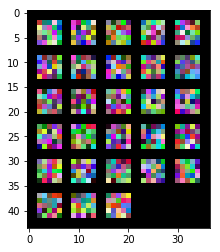

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(output)